<a href="https://colab.research.google.com/github/jaytrey777/Classification-Trees/blob/main/Classification_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

The target vector is the diagnosis as either malignant (M) or benign (B).



Use the following classifiers to obtain the highest accuracy possible on the test set:

1. Decision Tree Classifier

2. Bagging Classifier

3. Random Forest Classifier

Link to original dataset:
https://drive.google.com/file/d/1Zms1RfgkWrTp7S6_BFpeELYyvX1s2FSN/view

# Imports and Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn import set_config
set_config(display = 'diagram')

import warnings
warnings.filterwarnings('ignore')

# Data Loading & Cleaing

In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/02. Weeks 5-8: Machine Learning/07 Week 7: Classification/4. Practice Assignments/cancer.csv'
df = pd.read_csv(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Here is what I need to do to manipulate the data:
- delete the id column because there is a unique id for every person and that column will not help the model in any way. 
- benign (noncancerous) or malignant (cancerous) are the possible categories for the target variable. I am going to change the outcomes to the following:
 - 0 = benign 
 - 1 = malignant.

# Preprocessing

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace = True)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
X = df.drop(columns = ['id', 'diagnosis']).copy() # sets features eliminating the 'id' and the target columns
y = df['diagnosis'].copy() # sets target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) #train test split
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865


Since all of the columns are numerical, I only need to worry about processing them when creating my pipeline

In [10]:
#setting up a tuple to process the numerical columns but inputing the mean for any missing values that may come later. 
median_imputer = SimpleImputer(strategy = 'median')
scaler = StandardScaler()

numerical_pipeline = make_pipeline(median_imputer, scaler)

numerical_selector = make_column_selector(dtype_include = 'number')

numerical_tuple = (numerical_pipeline, numerical_selector)

In [11]:
#finishing up the preprocessor and fitting the training data.
preprocessor = make_column_transformer(numerical_tuple, remainder='drop', verbose_feature_names_out=False)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f00608167f0>)],
                  verbose_feature_names_out=False)

# Decision Tree Classifier

In [12]:
dec_tree = DecisionTreeClassifier()
dec_tree_pipeline = make_pipeline(preprocessor, dec_tree)
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f00608167f0>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [13]:
#Create predictions using data sets
decision_train_predictions = dec_tree_pipeline.predict(X_train)
decision_test_predictions = dec_tree_pipeline.predict(X_test)

## Metrics 

In [49]:
#Model Accuracy
print('Bagging Tree Training Metrics:\n', classification_report(y_train, decision_train_predictions))
print('\n')
print('Bagging Tree Testing Metrics:\n', classification_report(y_test, decision_test_predictions))

Bagging Tree Training Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Bagging Tree Testing Metrics:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



## Confusion Matrix

Text(0.5, 1.0, 'Decision Tree Testing Matrix')

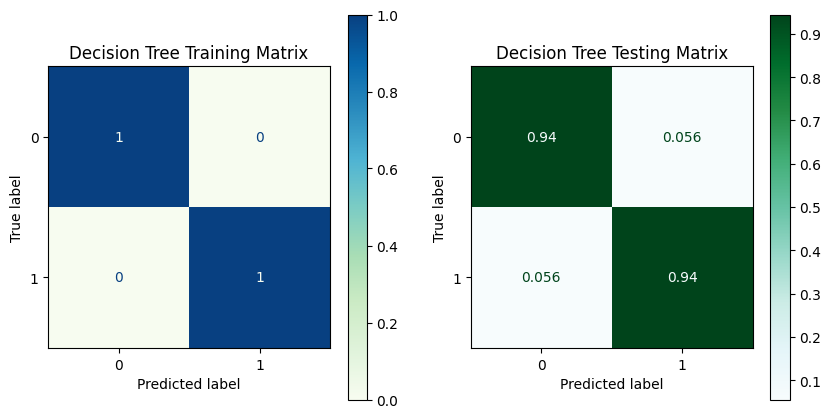

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, decision_train_predictions,
                                        ax=axes[0], cmap='GnBu',
                                        normalize='true')

axes[0].set_title('Decision Tree Training Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, decision_test_predictions,
                                        ax=axes[1], cmap='BuGn',
                                        normalize='true')

axes[1].set_title('Decision Tree Testing Matrix')

Text(0.5, 1.0, 'Decision Tree Testing Matrix')

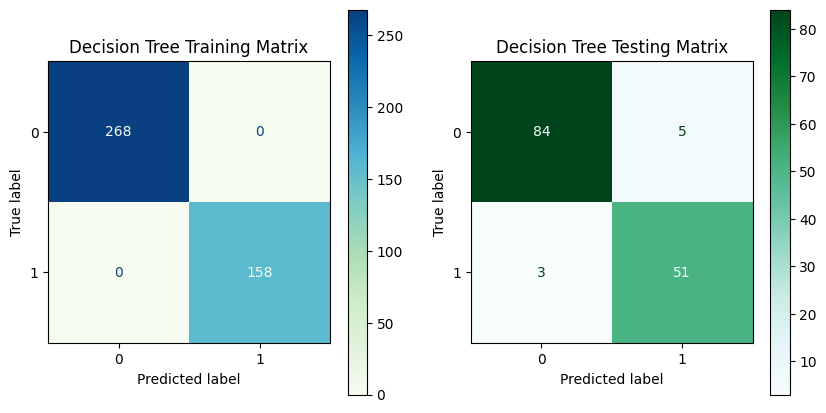

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, decision_train_predictions,
                                        ax=axes[0], cmap='GnBu',
                                        normalize=None)

axes[0].set_title('Decision Tree Training Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, decision_test_predictions,
                                        ax=axes[1], cmap='BuGn',
                                        normalize=None)

axes[1].set_title('Decision Tree Testing Matrix')

From this classifier:
1. The model accuracy is 94%

2. There were 5 false positives

3. There were 3 false negatives

#Bagging Classifier

In [17]:
bag_tree = BaggingClassifier()
bag_tree_pipeline = make_pipeline(preprocessor, bag_tree)
bag_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f00608167f0>)],
                                   verbose_feature_names_out=False)),
                ('baggingclassifier', BaggingClassifier())])

In [18]:
bag_train_predictions = bag_tree_pipeline.predict(X_train)
bag_test_predictions = bag_tree_pipeline.predict(X_test)

## Metrics

In [44]:
#Model Accuracy
print('Bagging Tree Training Metrics:\n', classification_report(y_train, bag_train_predictions))
print('\n')
print('Bagging Tree Testing Metrics:\n', classification_report(y_test, bag_test_predictions))

Bagging Tree Training Metrics:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       268
           1       1.00      0.99      0.99       158

    accuracy                           1.00       426
   macro avg       1.00      0.99      0.99       426
weighted avg       1.00      1.00      1.00       426



Bagging Tree Testing Metrics:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## Confusion Matrix

Text(0.5, 1.0, 'Bagging Tree Testing Matrix')

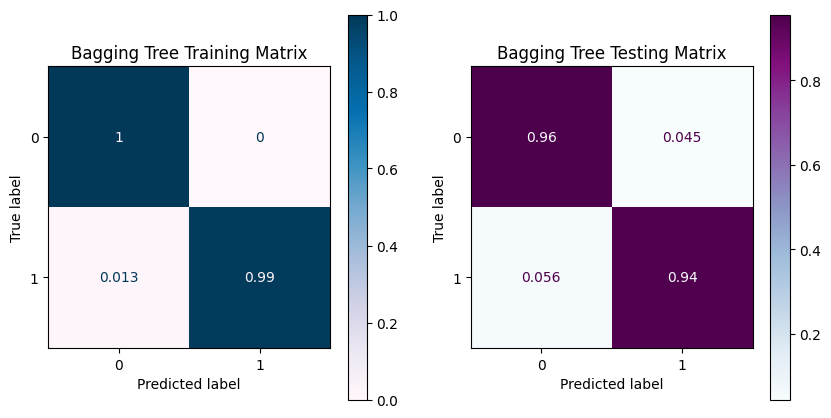

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, bag_train_predictions,
                                        ax=axes[0], cmap='PuBu',
                                        normalize='true')

axes[0].set_title('Bagging Tree Training Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, bag_test_predictions,
                                        ax=axes[1], cmap='BuPu',
                                        normalize='true')

axes[1].set_title('Bagging Tree Testing Matrix')

Text(0.5, 1.0, 'Bagging Tree Testing Matrix')

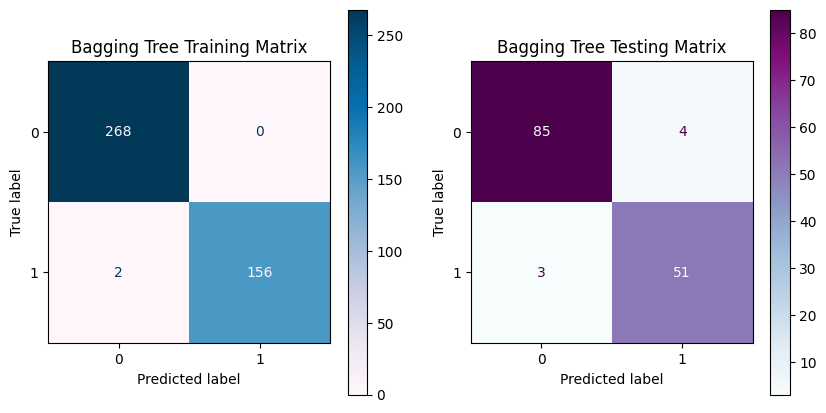

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, bag_train_predictions,
                                        ax=axes[0], cmap='PuBu',
                                        normalize=None)

axes[0].set_title('Bagging Tree Training Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, bag_test_predictions,
                                        ax=axes[1], cmap='BuPu',
                                        normalize=None)

axes[1].set_title('Bagging Tree Testing Matrix')

From this classifier:
1. The model accuracy is 95%

2. There were 4 false positives

3. There were 3 false negatives

# Random Forest Classifier

In [22]:
random_forest = RandomForestClassifier()
random_forest_pipeline = make_pipeline(preprocessor, random_forest)
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f00608167f0>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [23]:
random_forest_train_predictions = random_forest_pipeline.predict(X_train)
random_forest_test_predictions = random_forest_pipeline.predict(X_test)

## Metrics

In [31]:
#Model Accuracy
print('Random Forest Training Metrics:\n', classification_report(y_train, random_forest_train_predictions))
print('\n')
print('Random Forest Testing Metrics:\n', classification_report(y_test, random_forest_test_predictions))

Random Forest Training Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



Random Forest Testing Metrics:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## Confusion Matrix

Text(0.5, 1.0, 'Random Forest Testing Matrix')

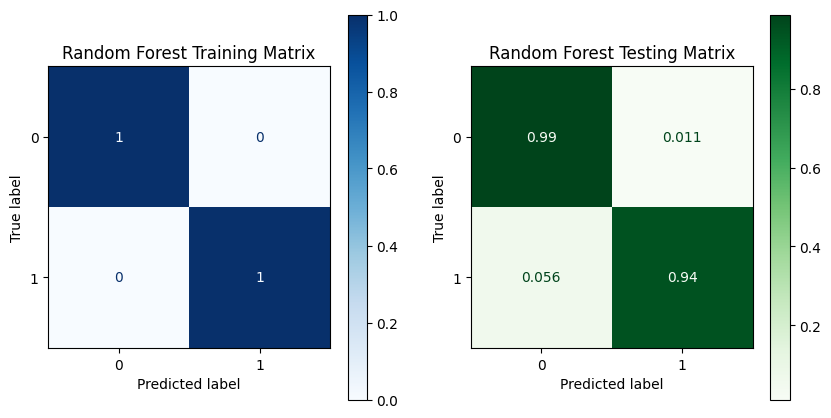

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, random_forest_train_predictions,
                                        ax=axes[0], cmap='Blues',
                                        normalize='true')

axes[0].set_title('Random Forest Training Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, random_forest_test_predictions,
                                        ax=axes[1], cmap='Greens',
                                        normalize='true')

axes[1].set_title('Random Forest Testing Matrix')

Text(0.5, 1.0, 'Random Forest Testing Matrix')

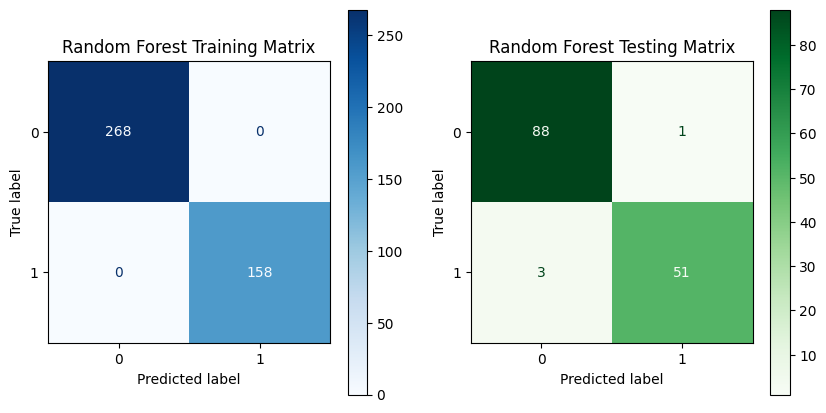

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, random_forest_train_predictions,
                                        ax=axes[0], cmap='Blues',
                                        normalize=None)

axes[0].set_title('Random Forest Training Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, random_forest_test_predictions,
                                        ax=axes[1], cmap='Greens',
                                        normalize=None)

axes[1].set_title('Random Forest Testing Matrix')

From this classifier:
1. The model accuracy is 97%

2. There was 1 false positive

3. There were 3 false negatives